In [1]:
import pandas as pd
df = pd.read_csv('../data/regression/test.csv')
df

,x,y
0,1,1.619379
1,2,1.857290
2,3,2.628194
3,4,2.725426
4,5,3.498926
5,6,3.867042
6,7,4.934539
7,8,4.864829
8,9,5.241539
9,10,5.823689


In [2]:
import torch
X = torch.from_numpy(df['x'].values).unsqueeze(1).float()
y = torch.from_numpy(df['y'].values).unsqueeze(1).float()

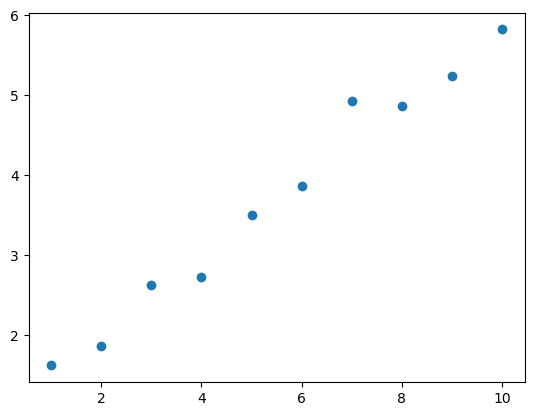

In [3]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.scatter(X, y)
plt.show()

In [4]:
from torch import nn
# 단순한 신경망
model = nn.Linear(in_features=1, out_features=1, bias=True)
print(model)
# 초기 파라미터
print(model.weight)
print(model.bias)

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[0.6131]], requires_grad=True)
Parameter containing:
tensor([-0.4391], requires_grad=True)


In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
print(model(X)) # predict(학습 전)

tensor([[0.1740],
        [0.7871],
        [1.4002],
        [2.0133],
        [2.6264],
        [3.2395],
        [3.8526],
        [4.4657],
        [5.0788],
        [5.6919]], grad_fn=<AddmmBackward0>)


In [6]:
for step in range(500):
    prediction = model(X)
    loss = criterion(input=prediction, target=y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"epoch: {step}, loss: {loss:.3f}")

epoch: 0, loss: 0.778
epoch: 1, loss: 0.704
epoch: 2, loss: 0.640
epoch: 3, loss: 0.587
epoch: 4, loss: 0.545
epoch: 5, loss: 0.512
epoch: 6, loss: 0.489
epoch: 7, loss: 0.475
epoch: 8, loss: 0.467
epoch: 9, loss: 0.465
epoch: 10, loss: 0.467
epoch: 11, loss: 0.471
epoch: 12, loss: 0.474
epoch: 13, loss: 0.476
epoch: 14, loss: 0.476
epoch: 15, loss: 0.474
epoch: 16, loss: 0.469
epoch: 17, loss: 0.463
epoch: 18, loss: 0.455
epoch: 19, loss: 0.446
epoch: 20, loss: 0.438
epoch: 21, loss: 0.429
epoch: 22, loss: 0.421
epoch: 23, loss: 0.414
epoch: 24, loss: 0.408
epoch: 25, loss: 0.403
epoch: 26, loss: 0.398
epoch: 27, loss: 0.395
epoch: 28, loss: 0.392
epoch: 29, loss: 0.388
epoch: 30, loss: 0.385
epoch: 31, loss: 0.382
epoch: 32, loss: 0.378
epoch: 33, loss: 0.374
epoch: 34, loss: 0.370
epoch: 35, loss: 0.365
epoch: 36, loss: 0.361
epoch: 37, loss: 0.356
epoch: 38, loss: 0.351
epoch: 39, loss: 0.346
epoch: 40, loss: 0.342
epoch: 41, loss: 0.338
epoch: 42, loss: 0.334
epoch: 43, loss: 0.33

In [7]:
print(model(X)) # predict(학습 후)

tensor([[1.5310],
        [2.0143],
        [2.4976],
        [2.9809],
        [3.4641],
        [3.9474],
        [4.4307],
        [4.9140],
        [5.3973],
        [5.8806]], grad_fn=<AddmmBackward0>)


In [8]:
def mse_loss(preds, trues):
    return torch.sum((preds - trues)**2) / preds.view(-1).shape[0]
mse_loss(model(X), y)

tensor(0.0406, grad_fn=<DivBackward0>)

In [9]:
loss.data.item(), model.weight.data.item(), model.bias.data.item()

(0.04061874747276306, 0.48328351974487305, 1.0477294921875)

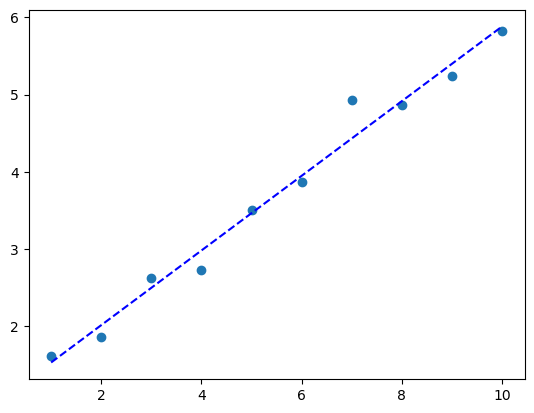

In [10]:
def display_results(model, x, y):
    pred = model(x)
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), pred.data.numpy(), 'b--')
    plt.show()
display_results(model, X, y)